<div style="font-family: Arial; line-height: 1.6; background-color:#f9f9f9; padding:20px; border-radius:10px;">

<h1 style="color: #1E90FF; text-align:center; text-shadow:1px 1px #888888;">About Dataset</h1>

<h2 style="color: #2E8B57;">Context</h2>
<p style="color: #555555;">
Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.
This dataset is from <strong style="color:#FF4500;">IBM Sample Data Sets</strong>.
</p>

<h2 style="color: #2E8B57;">Content</h2>
<p style="color: #555555;">Each row represents a customer, and each column contains a customer’s attributes described in the column metadata. The dataset includes:</p>
<ul style="color: #333333;">
    <li><strong style="color:#FF6347;">Churn:</strong> Customers who left within the last month.</li>
    <li><strong style="color:#FF6347;">Services:</strong> Phone, multiple lines, internet, online security, online backup, device protection, tech support, streaming TV and movies.</li>
    <li><strong style="color:#FF6347;">Account Information:</strong> Tenure, contract type, payment method, paperless billing, monthly charges, total charges.</li>
    <li><strong style="color:#FF6347;">Demographics:</strong> Gender, age range, presence of partners and dependents.</li>
</ul>

<h2 style="color: #2E8B57;">Objective</h2>
<p style="color: #555555;">
The objective of this analysis is to <strong style="color:#FF4500;">predict customer churn</strong> using the available features. By identifying customers likely to leave, businesses can develop targeted retention strategies to reduce churn and improve customer loyalty.
</p>

<h2 style="color: #2E8B57;">Results Interpretation</h2>
<p style="color: #555555;">From the model results:</p>
<ul style="color: #333333;">
    <li><strong style="color:#1E90FF;">Overall Accuracy:</strong> ~<span style="color:#FF4500;">78%</span>, showing that the model correctly predicts most customers.</li>
    <li><strong style="color:#1E90FF;">Non-Churn (Class 0):</strong> High precision and recall → the model reliably identifies non-churners.</li>
    <li><strong style="color:#1E90FF;">Churn (Class 1):</strong> Lower recall (~52%) → many churners are missed.</li>
    <li><strong style="color:#1E90FF;">F1-scores & Weighted Average:</strong> Reflect dataset imbalance → improvement may require <span style="color:#FF4500;">oversampling, class weighting, or advanced models</span>.</li>
</ul>

<p style="color:#555555;">
This analysis provides <strong style="color:#FF4500;">actionable insights</strong> for customer retention programs by identifying at-risk customers, allowing companies to intervene proactively.
</p>

<h2 style="color: #2E8B57;">Workflow / Steps Performed</h2>
<p style="color:#555555;">The analysis was conducted following these detailed steps:</p>
<ol style="color: #333333;">
    <li><strong style="color:#FF6347;">Exploring the Data:</strong> 
        <ul>
            <li>Loaded the dataset into a Pandas DataFrame.</li>
            <li>Examined the first few rows, data types, and summary statistics.</li>
            <li>Checked for missing values, duplicates, and basic distributions of features and the target.</li>
        </ul>
    </li>
    <li><strong style="color:#FF6347;">Data Cleaning and Preprocessing:</strong>
        <ul>
            <li>Handled missing or inconsistent values (e.g., replacing 'No internet service' with 'No').</li>
            <li>Converted categorical yes/no columns to numeric (0/1) for ML.</li>
            <li>Encoded other categorical variables using <b>one-hot encoding</b> or mapping (e.g., gender, contract type, payment method).</li>
            <li>Scaled numeric features such as tenure, monthly charges, and total charges using MinMaxScaler.</li>
            <li>Ensured the final DataFrame contains all numeric values suitable for model input.</li>
        </ul>
    </li>
    <li><strong style="color:#FF6347;">Building the Model:</strong>
        <ul>
            <li>Split the data into training and testing sets.</li>
            <li>Constructed a neural network with input, hidden, and output layers.</li>
            <li>Selected activation functions, optimizer, loss function, batch size, and number of epochs.</li>
            <li>Trained the model and monitored performance metrics such as loss and accuracy per epoch.</li>
        </ul>
    </li>
    <li><strong style="color:#FF6347;">Evaluating Results:</strong>
        <ul>
            <li>Predicted churn on the test dataset.</li>
            <li>Calculated performance metrics: <b>Accuracy, Precision, Recall, F1-score, and Confusion Matrix.</b></li>
            <li>Interpreted the results, identifying strengths (non-churn prediction) and weaknesses (churn detection).</li>
        </ul>
    </li>
</ol>

</div>


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6984,6447-GORXK,Male,0,No,Yes,31,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),25.00,789.2,No
3152,9909-DFRJA,Female,0,No,No,26,Yes,No,Fiber optic,Yes,...,Yes,Yes,No,Yes,One year,Yes,Bank transfer (automatic),95.85,2475.35,No
2064,7061-OVMIM,Female,0,Yes,Yes,30,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.55,608.5,No
3390,0621-TSSMU,Male,0,Yes,No,56,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.95,1126.75,No
3939,8945-GRKHX,Female,0,No,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,78.65,78.65,Yes


##### **Note** that the custumor id column is useless , so we remove it from our dataset

In [3]:
print(df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [4]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
 pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [8]:
pd.to_numeric(df.TotalCharges,errors='coerce'),pd.to_numeric(df.TotalCharges,errors='coerce').isnull()
#errors tells Pandas what to do when it finds a value that cannot be converted to a number
#'raise' : Default, Pandas will throw an error if any value cannot be converted.
#'ignore'	Pandas will leave the value as-is if it can’t convert.
#'coerce'	Pandas will replace unconvertible values with NaN (Not a Number).

(0         29.85
 1       1889.50
 2        108.15
 3       1840.75
 4        151.65
          ...   
 7038    1990.50
 7039    7362.90
 7040     346.45
 7041     306.60
 7042    6844.50
 Name: TotalCharges, Length: 7043, dtype: float64,
 0       False
 1       False
 2       False
 3       False
 4       False
         ...  
 7038    False
 7039    False
 7040    False
 7041    False
 7042    False
 Name: TotalCharges, Length: 7043, dtype: bool)

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]
#This line show us the rows of dataset that have NaN as TotalCharges(whitch have True)(this raws are blank in totalCharges)(blank mean ' ' as a value)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()].shape

(11, 20)

##### So as this 11 raws contain Nan TotalCharges , we drop them


In [11]:
df.iloc[488]['TotalCharges'] # iloc is integer location

' '

In [12]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [13]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [14]:
pd.to_numeric(df1.TotalCharges) # Now it must convert it without any error

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges.dtypes #Now it must float and not an object type

C:\Users\foura\AppData\Local\Temp\ipykernel_33868\2744142854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


dtype('float64')

 ### Let's do quick visualisation : How many of the loyal customers are living ? tenure feature(column) measue this

In [16]:
df1[df1.Churn=='No'].tenure # the tenure of customers that are not leaving

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

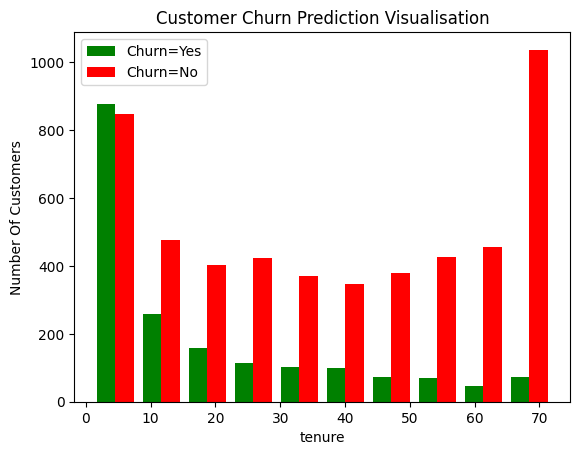

In [17]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualisation")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

<div style='font-size:20px'>
    we can see here  that the people who are with the company for a long time are not living
</div>

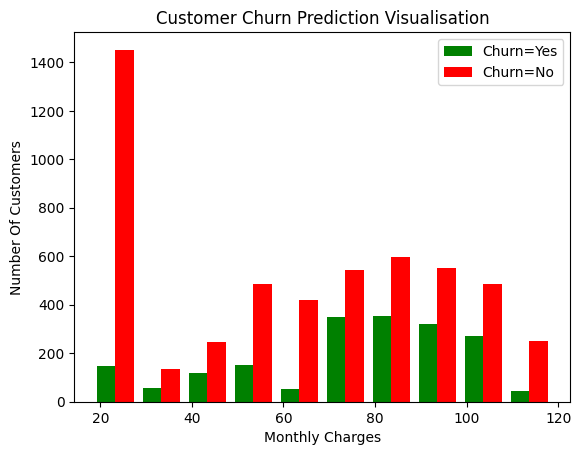

In [18]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges
plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualisation")

blood_sugar_men = [113,58,150,149,88,93,115,135,80,77,82,129]
blood_sugar_woman = [67,98,89,120,133,150,84,69,89,79,120,112,100]

plt.hist([mc_churn_yes,mc_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [19]:
def print_unique_col_values(df) :
    for column in df :
         if df[column].dtypes == 'object' :
             print(f'{column} : {df[column].unique()}')
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [20]:
df1.replace('No internet service' , 'No' , inplace=True)
df1.replace('No phone service' , 'No' , inplace=True)

C:\Users\foura\AppData\Local\Temp\ipykernel_33868\928069211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service' , 'No' , inplace=True)
C:\Users\foura\AppData\Local\Temp\ipykernel_33868\928069211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service' , 'No' , inplace=True)


In [21]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [22]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
                  'OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
                  'StreamingMovies','PaperlessBilling','Churn']
df1 = df1.copy()
df1[yes_no_columns] = df1[yes_no_columns].replace({'Yes': 1, 'No': 0})

C:\Users\foura\AppData\Local\Temp\ipykernel_33868\3542000966.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[yes_no_columns] = df1[yes_no_columns].replace({'Yes': 1, 'No': 0}).astype(int)


In [25]:
for col in df1 :
    print(f'{col} : {df1[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [27]:
df1['gender'].replace({'Female' : 1 , 'Male' : 0}).unique()

C:\Users\foura\AppData\Local\Temp\ipykernel_33868\1111888672.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].replace({'Female' : 1 , 'Male' : 0}).unique()


array([1, 0], dtype=int64)

In [28]:
df2 = pd.get_dummies(data=df1,columns=['InternetService'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')

In [29]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
55,Male,1,0,0,18,1,1,0,0,0,...,1,Month-to-month,1,Electronic check,95.45,1752.55,1,False,True,False
2263,Female,0,0,0,6,1,0,1,1,1,...,1,Month-to-month,1,Bank transfer (automatic),98.15,567.45,1,False,True,False
5866,Male,0,0,0,3,1,0,0,0,0,...,0,Month-to-month,1,Mailed check,19.65,68.35,0,False,False,True
5455,Female,0,0,0,6,1,0,0,0,0,...,0,Month-to-month,0,Credit card (automatic),19.70,129.55,0,False,False,True


In [39]:
df2['gender'] = df2['gender'].replace({'Female': 1, 'Male': 0})
df2['gender'] .unique()

array([1, 0], dtype=int64)

In [41]:
df2.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
1403,0,0,0,0,8,1,0,0,0,0,...,1,Month-to-month,1,Electronic check,66.25,546.45,0,True,False,False
378,1,0,0,0,61,1,1,1,1,1,...,1,Two year,0,Electronic check,89.65,5308.70,0,True,False,False
3056,0,0,1,1,50,1,1,1,0,0,...,0,Two year,1,Credit card (automatic),70.50,3486.65,0,True,False,False
1862,1,1,0,0,52,0,0,0,1,1,...,0,Month-to-month,1,Electronic check,50.50,2566.30,0,True,False,False


In [42]:
df3 = pd.get_dummies(data=df2,columns=['Contract','PaymentMethod'])
df3.columns.shape

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [43]:
df3.columns.shape

(27,)

In [44]:
df3.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
535,0,0,0,0,12,1,1,0,0,1,...,False,True,False,True,False,False,False,False,True,False
209,0,0,1,0,64,1,0,0,1,1,...,False,True,False,False,True,False,False,True,False,False
214,0,1,1,0,23,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
6746,1,0,1,1,4,1,0,0,1,0,...,True,False,False,True,False,False,False,False,False,True


In [46]:
True_False_columns = ['InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
df3 = df3.copy()
df3[True_False_columns] = df3[True_False_columns].replace({True: 1,False: 0})
df3.sample(4)

C:\Users\foura\AppData\Local\Temp\ipykernel_33868\730889201.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3[True_False_columns] = df3[True_False_columns].replace({True: 1,False: 0})


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2743,0,0,1,0,67,1,0,1,1,1,...,0,1,0,0,0,1,0,0,1,0
2075,0,1,0,0,56,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
3308,1,0,1,0,15,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
871,0,0,1,1,57,1,0,0,1,1,...,0,1,0,0,1,0,0,1,0,0


In [47]:
df3.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int32
Dependents                                   int32
tenure                                       int64
PhoneService                                 int32
MultipleLines                                int32
OnlineSecurity                               int32
OnlineBackup                                 int32
DeviceProtection                             int32
TechSupport                                  int32
StreamingTV                                  int32
StreamingMovies                              int32
PaperlessBilling                             int32
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int32
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

##### now as we see all data types are numbers

# Scaling the data

### We need to scale these columns : MonthlyCharges, tenure and TotalCharges

In [52]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df3[cols_to_scale] = scaler.fit_transform(df3[cols_to_scale])

In [53]:
df3.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6352,0,0,1,0,0.577465,1,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
4816,1,0,1,1,0.760563,1,1,1,1,0,...,1,0,0,0,1,0,0,1,0,0
3364,1,0,1,0,0.281690,1,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
1941,0,0,0,0,0.028169,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1


### Now our dataframe is ready to be used in deep learning

In [54]:
X = df3.drop('Churn',axis = 'columns')
y = df3['Churn']

In [55]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=5)
X_train.shape , X_test.shape

((5625, 26), (1407, 26))

In [56]:
len(X_train.columns)

26

In [60]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),  
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics = ['accuracy']
            )
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
176/176 [==============================] - 7s 7ms/step - loss: 0.5225 - accuracy: 0.7300
Epoch 2/50
176/176 [==============================] - 1s 7ms/step - loss: 0.4370 - accuracy: 0.7879
Epoch 3/50
176/176 [==============================] - 1s 8ms/step - loss: 0.4241 - accuracy: 0.7979
Epoch 4/50
176/176 [==============================] - 1s 7ms/step - loss: 0.4190 - accuracy: 0.8004
Epoch 5/50
176/176 [==============================] - 1s 7ms/step - loss: 0.4160 - accuracy: 0.8018
Epoch 6/50
176/176 [==============================] - 1s 6ms/step - loss: 0.4136 - accuracy: 0.8057
Epoch 7/50
176/176 [==============================] - 2s 9ms/step - loss: 0.4126 - accuracy: 0.8048
Epoch 8/50
176/176 [==============================] - 1s 8ms/step - loss: 0.4112 - accuracy: 0.8080
Epoch 9/50
176/176 [==============================] - 1s 6ms/step - loss: 0.4105 - accuracy: 0.8066
Epoch 10/50
176/176 [==============================] - 1s 7ms/step - loss: 0.4096 - accuracy: 0.8068

In [61]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 1s 5ms/step - loss: 0.4487 - accuracy: 0.7804


[0.44871246814727783, 0.7803837656974792]

In [62]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 3ms/step


array([[0.18850654],
       [0.44789776],
       [0.0093732 ],
       [0.77756274],
       [0.5724776 ]], dtype=float32)

In [63]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int32

In [64]:
y_pred=[]
for element in yp :
    if element > 0.5 :
        y_pred.append(1)
    else :
        y_pred.append(0)

In [65]:
y_pred[:5]

[0, 0, 0, 1, 1]

In [66]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report (y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.65      0.52      0.58       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

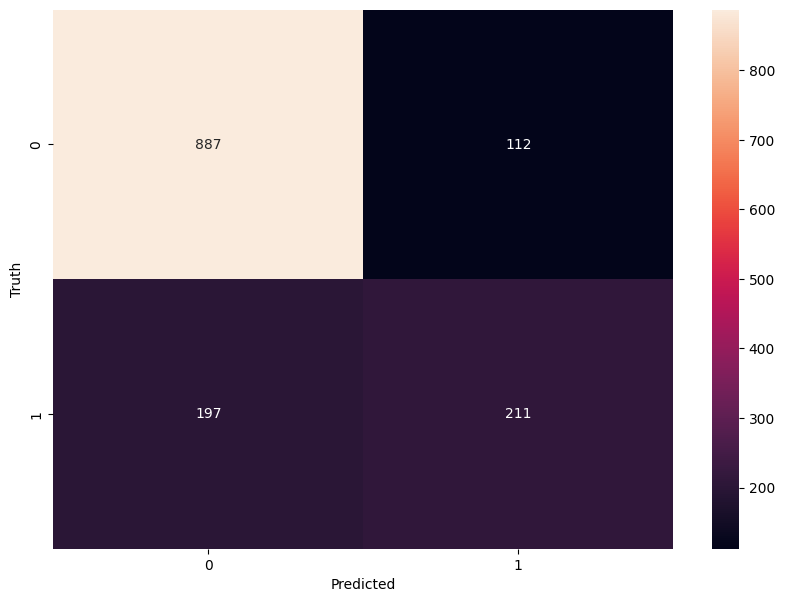

In [69]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm ,annot=True ,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Accuracy

In [70]:
round((887+211)/(887+112+197+221),2)

0.77

### Precision for 0 class , i.e . Precision for customers who did not churn

In [72]:
round((887/(197+887)),2)

0.82

### Precision for 1 class i.e. Precision for customers who actually churned

In [73]:
round((211/(112+211)),2)

0.65

### Recall for 0 class

In [74]:
round((887/(887+112)),2)

0.89

### Recall for 1 class

In [75]:
round((211/(211+197)),2)

0.52